In [5]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


In [6]:
import tensorflow as tf
from tensorflow import keras

In [7]:
from keras.datasets import fashion_mnist

In [8]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

In [9]:
class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Bag","Ankle boot"]

In [10]:
#DATA RESHAPE
X_train_full=X_train_full.reshape((60000,28,28,1))
X_test=X_test.reshape((10000,28,28,1))

In [11]:
#DATA NORMALIZATION
X_train_n=X_train_full/255.0
X_test_n=X_test/255.0

In [12]:
#split the data into train/validation/test datasets

X_valid,X_train=X_train_n[:5000],X_train_n[5000:]
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
X_test=X_test_n

In [13]:
#create the model architecture
np.random.seed(42)
tf.random.set_seed(42)

In [14]:
#architecture
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='valid',activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [20]:
model_history=model.fit(X_train,y_train,epochs=30,batch_size=64,
                       validation_data=(X_valid,y_valid))

Epoch 1/30
860/860 [==============================] - 33s 38ms/step - loss: 0.2024 - accuracy: 0.9262 - val_loss: 0.2791 - val_accuracy: 0.8962
Epoch 2/30
860/860 [==============================] - 35s 40ms/step - loss: 0.1980 - accuracy: 0.9286 - val_loss: 0.2539 - val_accuracy: 0.9056
Epoch 3/30
860/860 [==============================] - 34s 39ms/step - loss: 0.1948 - accuracy: 0.9289 - val_loss: 0.3846 - val_accuracy: 0.8612
Epoch 4/30
860/860 [==============================] - 32s 38ms/step - loss: 0.1903 - accuracy: 0.9301 - val_loss: 0.2760 - val_accuracy: 0.9010
Epoch 5/30
860/860 [==============================] - 33s 38ms/step - loss: 0.1887 - accuracy: 0.9315 - val_loss: 0.2507 - val_accuracy: 0.9098
Epoch 6/30
860/860 [==============================] - 33s 38ms/step - loss: 0.1832 - accuracy: 0.9335 - val_loss: 0.2495 - val_accuracy: 0.9094
Epoch 7/30
860/860 [==============================] - 33s 38ms/step - loss: 0.1798 - accuracy: 0.9349 - val_loss: 0.2791 - val_accuracy:

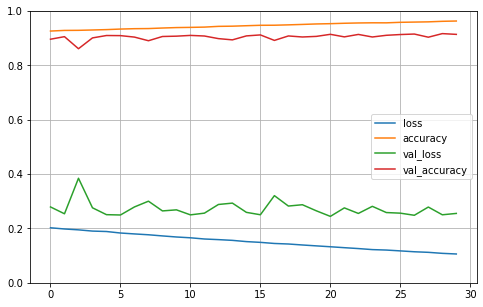

In [21]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) 
plt.show()

In [22]:
ev=model.evaluate(X_test_n,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.2658 - accuracy: 0.9139


In [23]:
ev

[0.26582071185112, 0.9139000177383423]

In [24]:
X_new=X_test[:3]

In [25]:
y_pred=model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [26]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


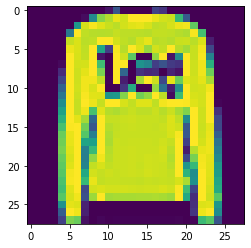

In [32]:
print(plt.imshow(X_test[1].reshape((28,28))))